In [68]:
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [32]:
news = """The Mariana Trench, a scar on the Earth's surface plunging deeper than Mount Everest is tall, has long been shrouded in mystery. Its crushing pressures and perpetual darkness have kept it largely unexplored, a realm of fantastical creatures and untold secrets. However, recent advancements in submersible technology and a surge of scientific curiosity are finally allowing us to peel back the layers of this underwater enigma.
Unveiling the Abyssal Plain:
Scientists aboard the research vessel, the Challenger Deep, have recently completed a series of dives, reaching depths never before explored by humans. Equipped with state-of-the-art sonar and cameras, they have mapped vast stretches of the trench floor, revealing a landscape both desolate and strangely beautiful.
The abyssal plain, a flat expanse at the trench's bottom, is surprisingly active. Hydrothermal vents spew superheated, mineral-rich water, creating vibrant ecosystems unlike anywhere else on Earth. Strange, eyeless fish and giant amphipods, scavenging crustaceans, thrive in this alien environment, their bodies adapted to the extreme conditions.
Life Finds a Way:
Perhaps the most astonishing discovery is the abundance of microbial life. Single-celled organisms, known as extremophiles, have been found thriving in the crushing pressure and near-freezing temperatures. These organisms, which may hold clues to the origins of life itself, challenge our understanding of the limits of life on Earth and potentially beyond.
A Race Against Time:
While these discoveries are groundbreaking, they also raise concerns. The presence of microplastics, carried by ocean currents, has been confirmed even in the deepest parts of the trench, highlighting the pervasive reach of human pollution. Additionally, the potential for deep-sea mining poses a significant threat to this fragile ecosystem.
Scientists are urging international cooperation and responsible environmental policies to ensure the Mariana Trench remains a source of wonder and scientific discovery for generations to come."""

In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
# Sentence splitting
sents = nltk.sent_tokenize(news)

In [35]:
# Tokenizartion
tokens = []
for sent in sents:
  tokens.append(nltk.word_tokenize(sent))

In [36]:
# Removing stopwords and punctuation
filtered_words = []
stop_words = set(nltk.corpus.stopwords.words('english'))
for sent in tokens:
  filtered_words.append([i.lower() for i in sent if i.lower() not in stop_words and (i.isalpha() or i.isdigit())])

In [37]:
# lemmatization
lemmatizer = WordNetLemmatizer()
lemma = []
for sent in filtered_words:
  lemma.append([lemmatizer.lemmatize(i) for i in sent])

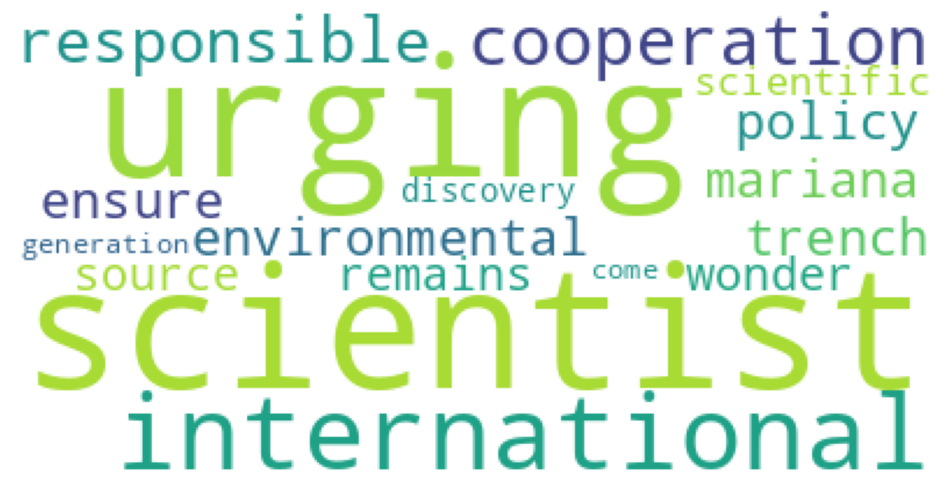

In [38]:
lemma_text = ''
for word_list in lemma:
  lemma_text = ' '.join([i for i in word_list])

plt.figure(figsize=(12, 12))
wordcloud = WordCloud(background_color='White').generate(lemma_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [52]:
# POS tagging
nlp = spacy.load("en_core_web_sm")
ner_tags = {}
pos_tags = {}
for sent in lemma:
  doc = nlp(' '.join(sent))
  for token in doc:
    if token.pos_ not in pos_tags.keys():
      pos_tags[token.pos_] = [token]
    else:
      pos_tags[token.pos_].append(token)
  for entity in doc.ents:
    if entity.label_ not in ner_tags.keys():
      ner_tags[entity.label_] = [entity.text]
    else:
      ner_tags[entity.label_].append(entity.text)

In [53]:
ner_tags

{'PERSON': ['mariana', 'mariana'],
 'LOC': ['mount everest'],
 'CARDINAL': ['microplastics']}

In [41]:
pos_tags

{'PROPN': [mariana,
  trench,
  scar,
  mount,
  everest,
  alien,
  environment,
  scientist,
  mariana,
  trench],
 'NOUN': [earth,
  surface,
  mystery,
  pressure,
  darkness,
  creature,
  secret,
  advancement,
  technology,
  surge,
  curiosity,
  layer,
  enigma,
  abyssal,
  scientist,
  research,
  vessel,
  challenger,
  series,
  dive,
  depth,
  human,
  camera,
  trench,
  floor,
  landscape,
  abyssal,
  expanse,
  trench,
  bottom,
  hydrothermal,
  vent,
  spew,
  water,
  ecosystem,
  earth,
  fish,
  scavenging,
  crustacean,
  body,
  condition,
  life,
  way,
  discovery,
  abundance,
  life,
  organism,
  extremophiles,
  pressure,
  temperature,
  organism,
  clue,
  origin,
  life,
  challenge,
  limit,
  life,
  earth,
  race,
  time,
  discovery,
  groundbreaking,
  concern,
  presence,
  microplastics,
  ocean,
  current,
  part,
  trench,
  pollution,
  mining,
  threat,
  fragile,
  ecosystem,
  cooperation,
  policy,
  ensure,
  source,
  discovery,
  gene

In [54]:
def generate_headline(pos_dict, ner_dict):
  # Extract key phrases and verbs using dictionaries
  key_phrases = []
  verbs = []
  nouns = []
  for tag, word_list in ner_dict.items():
      if tag == 'ORG':
        for i in word_list:
          key_phrases.append(i)
      elif tag == 'LOC':
        for i in word_list:
          key_phrases.append(i)

  for tag, word_list in pos_dict.items():
      for word in word_list:
        if tag == "VERB":
          verbs.append(word)

  for tag, word_list in pos_dict.items():
      for word in word_list:
        if tag == "NOUN":
          nouns.append(word)

  # Combine key phrases and verbs to create headline options
  headlines = []
  for phrase in key_phrases:
    for verb in verbs:
      for noun in nouns:
        headlines.append(f"{phrase} {verb} {noun}")

  # Choose the most relevant headline (replace this with your preferred method)
  return headlines


In [57]:
headlines = generate_headline(pos_tags, ner_tags)

In [58]:
class Ngram:
  def __init__(self, corpus):
    self.corpus = corpus
    self.words = []
    for sent in corpus:
      self.words += nltk.word_tokenize(sent)
    self.unique_words = set(self.words)

  def unigram(self):
    unigram = dict(Counter(self.words))
    return unigram

  def bigram(self):
    bigram_counts = {}
    for i in range(len(self.words)-1):
      bigram = (self.words[i], self.words[i+1])
      if bigram in bigram_counts:
          bigram_counts[bigram] += 1
      else:
          bigram_counts[bigram] = 1
    return bigram_counts

  def calc_probabilty(self, sentence):

    unigram = self.unigram()
    bigram_counts = self.bigram()

    words = nltk.word_tokenize(sentence)
    probability = 1

    for i in range(len(words) - 1):
      bigram = (words[i], words[i + 1])
      if bigram in bigram_counts.keys():
        probability *= (bigram_counts[bigram])/ (unigram[bigram[0]])
      else:
        # Add1 smoothing for 0 probability values
        if bigram[0] in bigram_counts.keys():
          probability *= (1)/ (unigram[bigram[0]]+len(self.unique_words))
        else:
          probability *= (1)/ (len(self.unique_words))

    return probability

In [59]:
obj = Ngram(news.split('.'))

In [60]:
print('Unigram: ', obj.unigram())
print('\n\nBigram: ', obj.bigram())

Unigram:  {'The': 3, 'Mariana': 2, 'Trench': 2, ',': 26, 'a': 9, 'scar': 1, 'on': 3, 'the': 18, 'Earth': 3, "'s": 2, 'surface': 1, 'plunging': 1, 'deeper': 1, 'than': 1, 'Mount': 1, 'Everest': 1, 'is': 3, 'tall': 1, 'has': 2, 'long': 1, 'been': 3, 'shrouded': 1, 'in': 5, 'mystery': 1, 'Its': 1, 'crushing': 2, 'pressures': 1, 'and': 10, 'perpetual': 1, 'darkness': 1, 'have': 4, 'kept': 1, 'it': 1, 'largely': 1, 'unexplored': 1, 'realm': 1, 'of': 13, 'fantastical': 1, 'creatures': 1, 'untold': 1, 'secrets': 1, 'However': 1, 'recent': 1, 'advancements': 1, 'submersible': 1, 'technology': 1, 'surge': 1, 'scientific': 2, 'curiosity': 1, 'are': 3, 'finally': 1, 'allowing': 1, 'us': 1, 'to': 6, 'peel': 1, 'back': 1, 'layers': 1, 'this': 3, 'underwater': 1, 'enigma': 1, 'Unveiling': 1, 'Abyssal': 1, 'Plain': 1, ':': 3, 'Scientists': 2, 'aboard': 1, 'research': 1, 'vessel': 1, 'Challenger': 1, 'Deep': 1, 'recently': 1, 'completed': 1, 'series': 1, 'dives': 1, 'reaching': 1, 'depths': 1, 'never'

In [61]:
prob_headline = []
for headline in headlines:
  prob = obj.calc_probabilty(i)
  prob_headline.append((headline, prob))

In [65]:
# Sorting based on probabilities
top_headlines = sorted(prob_headline, key=lambda x: x[1], reverse=True)

In [82]:
# Displaying top results
for headline, prob in top_headlines[:5]:
  print(f'\n\n[bold cyan]{headline.upper()}[/bold cyan]\nwith probabilty [green]{prob}[/green]')

MOUNT EVEREST PLUNGING EARTH
with probabilty 2.2808776141279832e-12

MOUNT EVEREST PLUNGING SURFACE
with probabilty 2.2808776141279832e-12

MOUNT EVEREST PLUNGING MYSTERY
with probabilty 2.2808776141279832e-12

MOUNT EVEREST PLUNGING PRESSURE
with probabilty 2.2808776141279832e-12

MOUNT EVEREST PLUNGING DARKNESS
with probabilty 2.2808776141279832e-12